In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
sys.path.append("../")
from src.models.augmentations import *
from data_scripts.PI_CAI_Detection import PI_CAI_Detection

/u/home/seel/.conda/envs/conda-adlm/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
columns = pd.read_csv("/data1/practical-sose23/morphometric/picai_labels_cropped/clinical_information/marksheet_filled_normalized.csv").columns
columns

Index(['Unnamed: 0', 'patient_id', 'study_id', 'patient_age', 'psa', 'psad',
       'prostate_volume', 'case_ISUP', 'case_csPCa',
       'original_shape_Elongation_TW2',
       ...
       'original_gldm_LargeDependenceEmphasis_ADC',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_ADC',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis_ADC',
       'original_gldm_LowGrayLevelEmphasis_ADC',
       'original_gldm_SmallDependenceEmphasis_ADC',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis_ADC',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis_ADC',
       'ellipse_vol_ADC', 'patient_id_ADC', 'prostate_volume_ADC'],
      dtype='object', length=219)

In [3]:
import torch
import os
import numpy as np
import torch.nn as nn
from torch import Tensor, from_numpy, randn, full
from torch.autograd.variable import Variable
from random import uniform

from monai.transforms import (
    RandFlip,
    RandRotate,
    RandAdjustContrast,
    RandSpatialCrop,
    Resize
)

In [19]:
table_path = '/data1/practical-sose23/morphometric/picai_labels_cropped/clinical_information/marksheet_filled_normalized.csv'

df = pd.read_csv(table_path)
df.columns

Index(['Unnamed: 0', 'patient_id', 'study_id', 'patient_age', 'psa', 'psad',
       'prostate_volume', 'case_ISUP', 'case_csPCa',
       'original_shape_Elongation_TW2',
       ...
       'original_gldm_LargeDependenceEmphasis_ADC',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_ADC',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis_ADC',
       'original_gldm_LowGrayLevelEmphasis_ADC',
       'original_gldm_SmallDependenceEmphasis_ADC',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis_ADC',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis_ADC',
       'ellipse_vol_ADC', 'patient_id_ADC', 'prostate_volume_ADC'],
      dtype='object', length=219)

In [20]:
image_path='/data1/practical-sose23/morphometric/data_cropped'
labels_path='/data1/practical-sose23/morphometric/picai_labels_cropped'



modalities=["t2w"]
resample=False
targetVoxelShape= (1.0, 1.0, 3.0) #(0.5, 0.5, 3.0)#(1,1,1) #EXP1: STUPID RESULTS
targetimageSize = [100, 100, 25]#(500,500,50)
multiModal=True
useAI_Segmentation=False
biasFeildCorrection=False
normalization = True
toShuffle = False
batchSize = 1


t2w = []
adc = ["original_gldm_SmallDependenceHighGrayLevelEmphasis_ADC"]


In [28]:


dataset = PI_CAI_Detection(image_path=image_path,labels_path=labels_path,modalities=modalities,\
                            multiModal=multiModal,useAI_Segmentation=useAI_Segmentation,biasFeildCorrection=biasFeildCorrection,normalization=normalization,\
                            transform=augmentation_contrastive ,t2w_features = t2w, adc_features = adc)

for i in range(3):
    #print(i)
    view_1, view_2, features = dataset.__getitem__(i)
    #print(data.shape)
    #dataset.plot(target)
    print(features)

print("======== Corrupted =========")

dataset = PI_CAI_Detection(image_path=image_path,labels_path=labels_path,modalities=modalities,\
                            multiModal=multiModal,useAI_Segmentation=useAI_Segmentation,biasFeildCorrection=biasFeildCorrection,normalization=normalization,\
                            transform=augmentation_contrastive ,t2w_features = t2w, adc_features = adc, corruption=0)

for i in range(3):
    #print(i)
    view_1, view_2, features = dataset.__getitem__(i)
    #print(data.shape)
    #dataset.plot(target)
    print(features)

(1.0292093499295172, 0.0455118660894662, -0.0359693762608839, -0.0319119224621857, 0.643568892724305)
(-0.2223285282836828, 0.0471551734135245, -0.3124739288379747, -0.0319119224621857, 0.4889136980109274)
(-1.0566871137591496, 0.0397602904552623, -0.3676760410625662, -0.0319119224621857, 0.2646687122581773)
======== Corrupted =========
(1.0292093499295172, 0.0455118660894662, -0.0359693762608839, -0.0319119224621857, 0.643568892724305)
(-0.2223285282836828, 0.0471551734135245, -0.3124739288379747, -0.0319119224621857, 0.4889136980109274)
(-1.0566871137591496, 0.0397602904552623, -0.3676760410625662, -0.0319119224621857, 0.2646687122581773)


(1.0292093499295172, 0.0455118660894662, -0.0359693762608839, -0.0319119224621857, 0.70613885134089)
(0.4729702929458728, 0.043868558765408, -0.3124739288379747, -0.0319119224621857, 0.4954353863517562)
(-2.4472847562182607, 0.0417322592441322, -0.2572718166133833, -0.0319119224621857, 0.2646687122581773)
(0.8901495856836061, 0.054221394906975, -0.1836690003139278, -0.0319119224621857, 0.5221719919089953)
(-1.612926170742794, 0.0460048582866837, -0.2940732247631109, -0.0319119224621857, 0.5604091367850991)
(-0.2223285282836828, 0.0427182436385672, -0.0364633677150172, -0.0319119224621857, 0.5244289234913869)
(-0.0832687640377716, 0.0450188738922488, -0.1100661840144725, -0.0319119224621857, 0.6916069056455794)
(-0.500448056775505, 0.1180451428332674, 0.0371394485844381, -0.0319119224621857, -1.6769513446036954)
(0.3339105286999617, 0.0722977754716159, -0.3676760410625662, -0.0319119224621857, 0.4891250423486232)
(0.1948507644540505, 0.0953040780084315, -0.2940732247631109, -0.031911922

In [7]:

print(data.size())
print(data.min(), data.max())



NameError: name 'data' is not defined

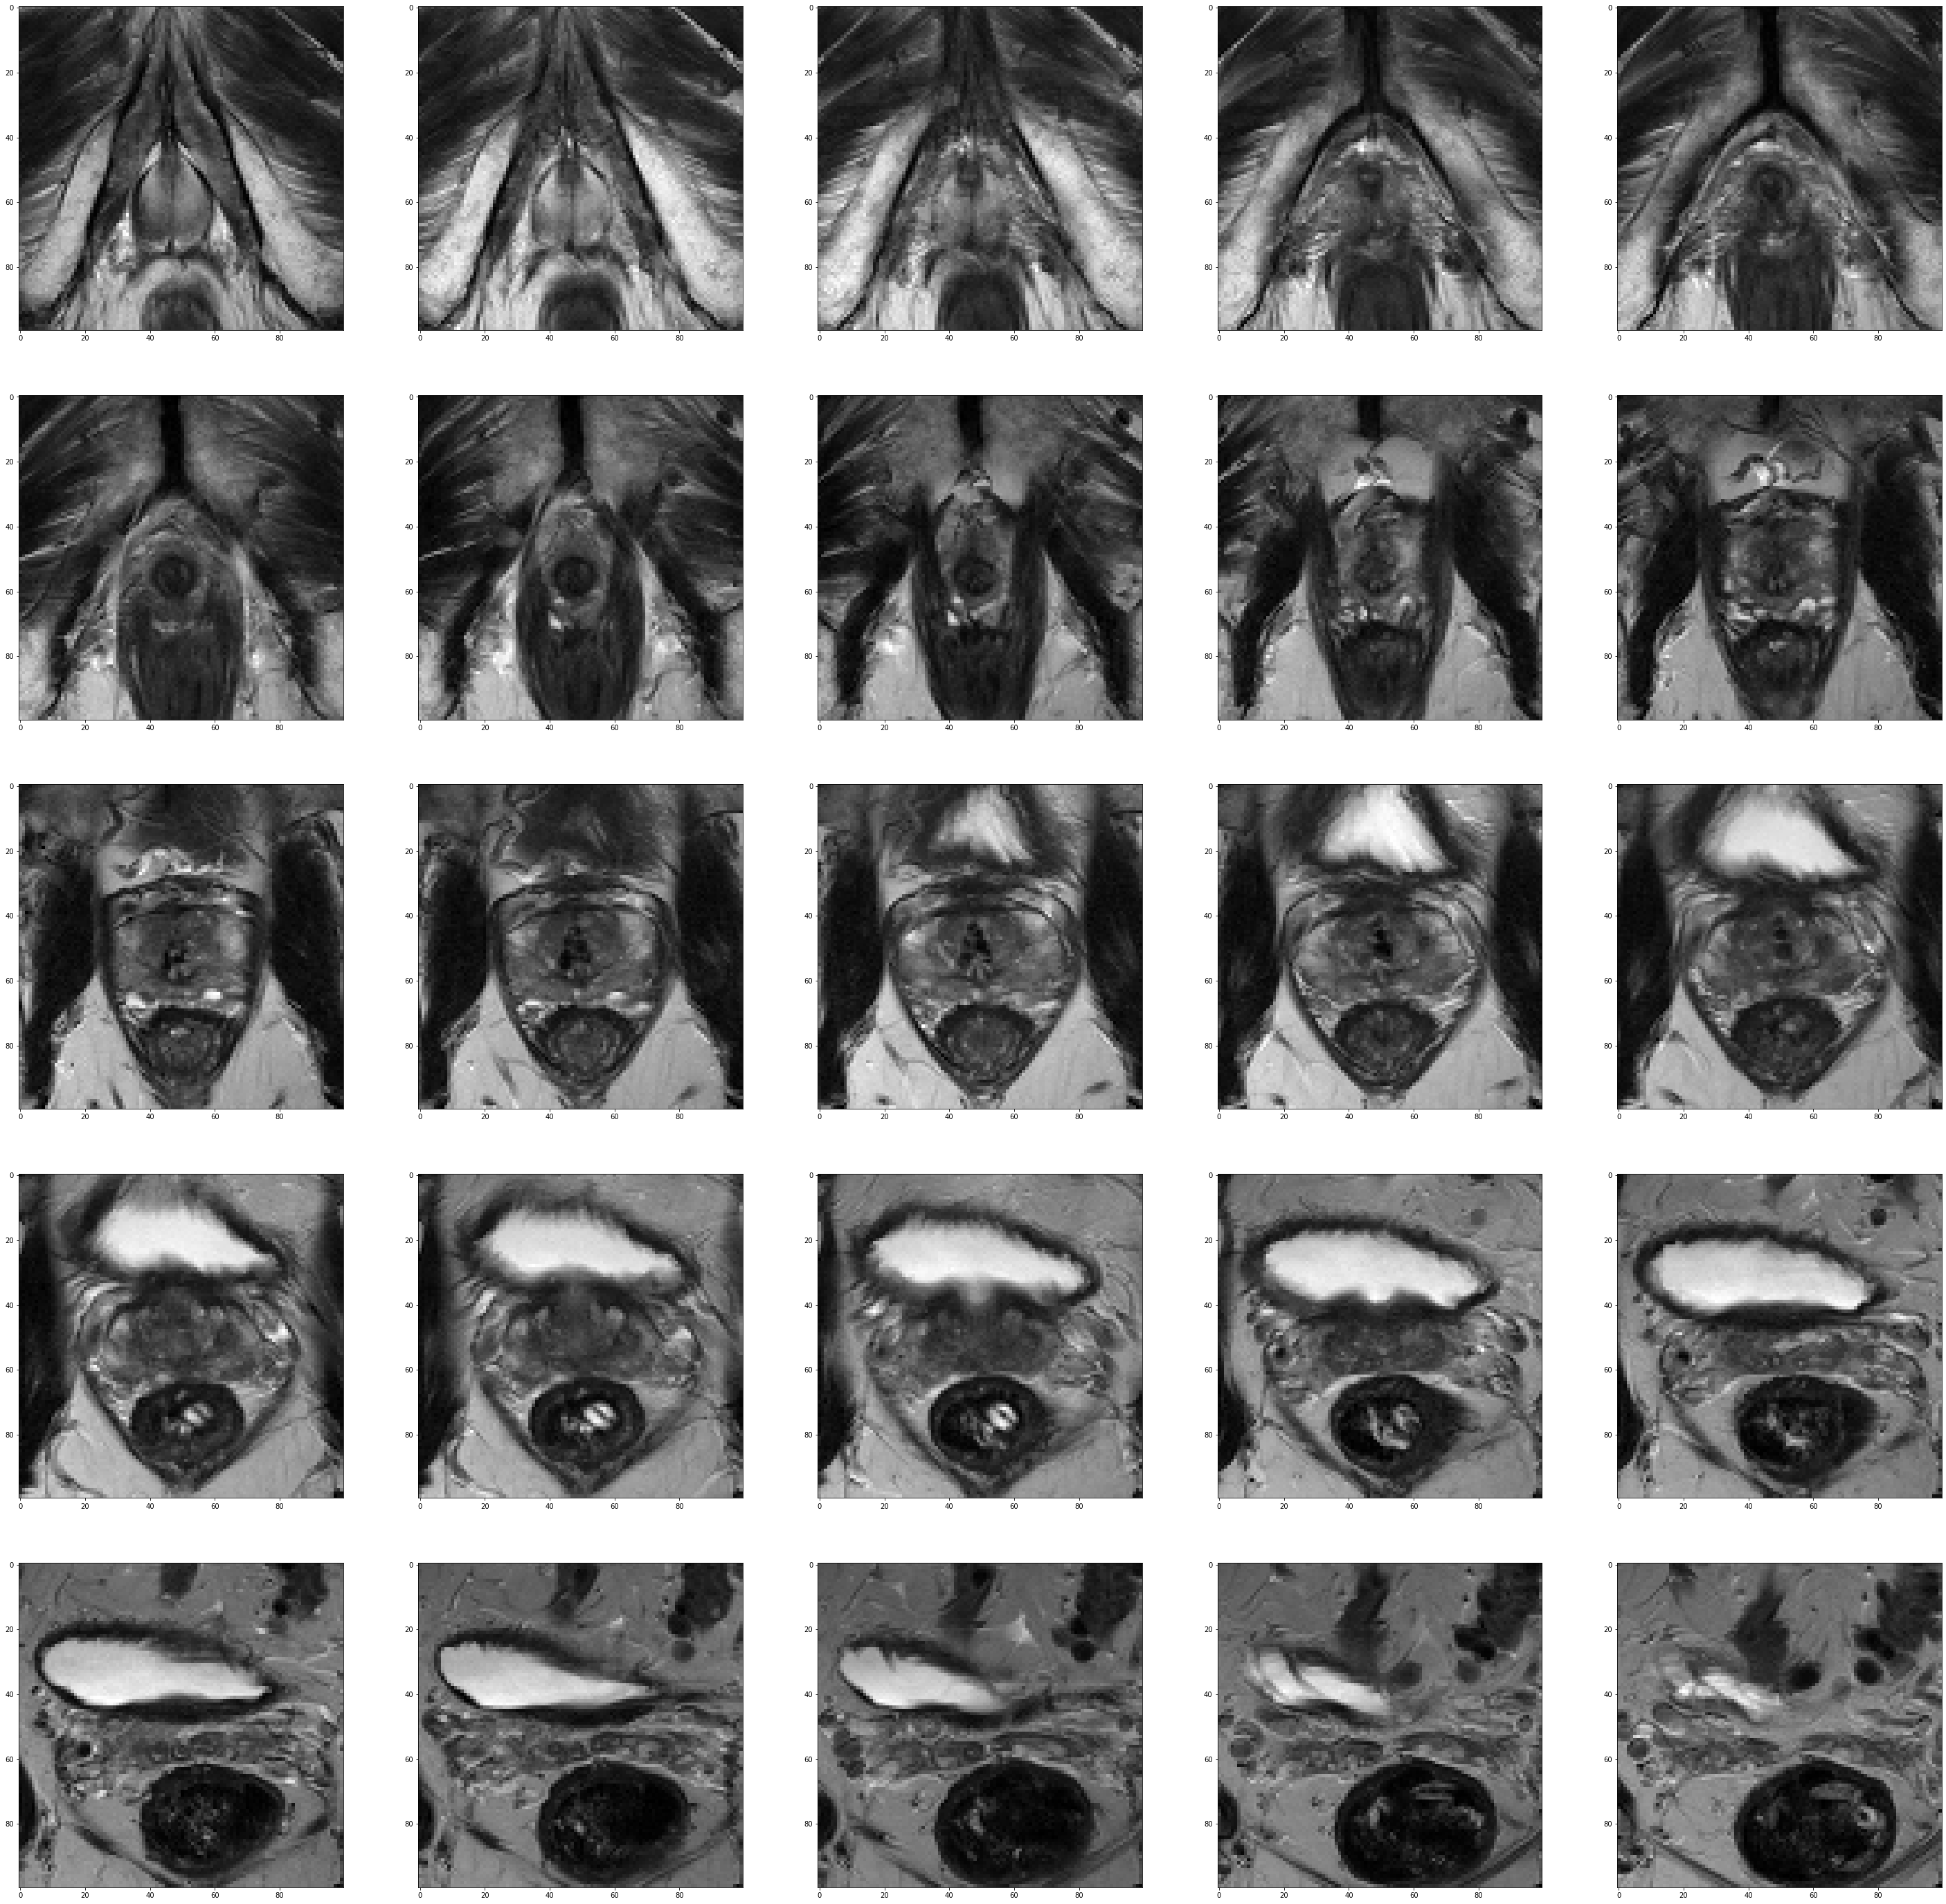

In [ ]:
dataset.plot(data)

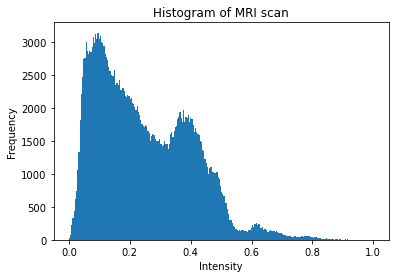

In [ ]:
np_image = data.numpy().flatten()

# Plot the histogram of intensities using matplotlib
plt.hist(np_image, bins=256)
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of MRI scan")
plt.show()